## Visualising representation of women and men from Google's public data

See: https://diversity.google/annual-report/representation/

Datasource: [Big Query dataset](https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/google-diversity-annual-report?q=search&referrer=search&project=bigquery-public-data)

Caveat: Not sure why there are only two global genders given, and why they are called "female" and "male". Google claims that they do self-report on a wider range of genders.

In [81]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [82]:
# How to fetch this data
# 1. Load the public dataset in Big Query. Explort the table dar_intersectional_representation as a csv file
df = pd.read_csv('google_dei_dar_intersectional_representation.csv')
df

,workforce,report_year,gender_us,race_asian,race_black,race_hispanic_latinx,race_native_american,race_white
0,representation_tech,2014,female,0.083,0.004,0.005,0.002,0.086
1,representation_tech,2015,female,0.091,0.004,0.007,0.002,0.090
2,representation_tech,2016,female,0.101,0.004,0.007,0.002,0.092
3,representation_tech,2017,female,0.112,0.005,0.008,0.002,0.093
4,representation_tech,2018,female,0.121,0.005,0.009,0.002,0.096
...,...,...,...,...,...,...,...,...
59,representation_leadership,2017,male,0.201,0.009,0.016,0.004,0.538
60,representation_leadership,2018,male,0.200,0.011,0.019,0.004,0.524
61,representation_leadership,2019,male,0.209,0.015,0.020,0.003,0.501
62,representation_leadership,2020,male,0.211,0.015,0.022,0.002,0.491


In [86]:
df_tech = df[df["workforce"] == "representation_tech" ].copy()
df_tech["percent"] = df["race_asian"] + df["race_black"] + df["race_hispanic_latinx"] + df["race_native_american"] + df["race_white"]
df_tech

,workforce,report_year,gender_us,race_asian,race_black,race_hispanic_latinx,race_native_american,race_white,percent
0,representation_tech,2014,female,0.083,0.004,0.005,0.002,0.086,0.180
1,representation_tech,2015,female,0.091,0.004,0.007,0.002,0.090,0.194
2,representation_tech,2016,female,0.101,0.004,0.007,0.002,0.092,0.206
3,representation_tech,2017,female,0.112,0.005,0.008,0.002,0.093,0.220
4,representation_tech,2018,female,0.121,0.005,0.009,0.002,0.096,0.233
5,representation_tech,2019,female,0.132,0.006,0.010,0.002,0.099,0.249
6,representation_tech,2020,female,0.142,0.007,0.011,0.002,0.096,0.258
7,representation_tech,2021,female,0.149,0.009,0.013,0.002,0.097,0.270
8,representation_tech,2014,male,0.268,0.011,0.030,0.006,0.538,0.853
9,representation_tech,2015,male,0.273,0.013,0.033,0.005,0.517,0.841


In [84]:
df_tech = df_tech[["workforce","report_year","gender_us","percent"]]
df_tech.sort_values(by=['report_year', 'gender_us'])

,workforce,report_year,gender_us,percent
0,representation_tech,2014,female,0.180
8,representation_tech,2014,male,0.853
1,representation_tech,2015,female,0.194
9,representation_tech,2015,male,0.841
2,representation_tech,2016,female,0.206
10,representation_tech,2016,male,0.825
3,representation_tech,2017,female,0.220
11,representation_tech,2017,male,0.813
4,representation_tech,2018,female,0.233
12,representation_tech,2018,male,0.800


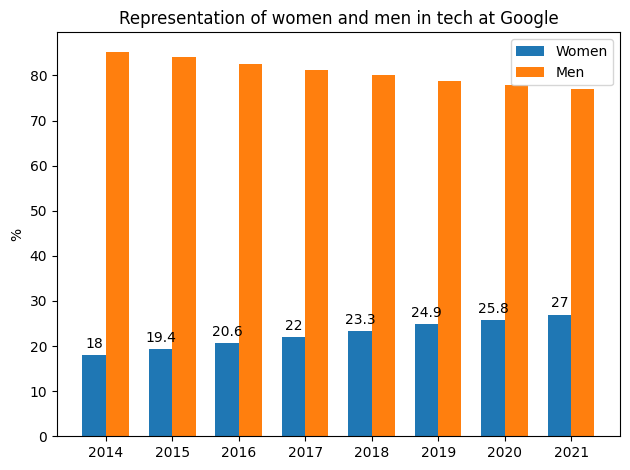

In [85]:
labels = list(df_tech['report_year'].unique()) #.map(lambda x: str(x))
labels = list(map(str, labels))

women_percentages = df_tech[df_tech["gender_us"] == "female" ]["percent"].values * 100
men_percentages = df_tech[df_tech["gender_us"] == "male" ]["percent"].values * 100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, women_percentages, width=width, label='Women')
rects2 = ax.bar(x + width/2, men_percentages, width=width, label='Men')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Representation of women and men in tech at Google')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
fig